In [1]:
%matplotlib inline
from segmnist import create_dataset_generator 

base_params = {
    'mnist_dataset': 'mnist-training',
    'digit_positioning': 'random',
    'scale_range': (0.75, 1.5),
    'im_shape': (3, 56, 56),
    'bg_pix_mul': 3,
    'batch_size': 256,
    'min_digits': 2,
    'max_digits': 3,
    'nclasses': 12,
    'p_fgmodatt_set': 0.0,
    'fgmodatt_color_overlap': (0, 1),
    'pwhitenoise': 0.0,
    'pgratings': 0.0,
    'pfgmod': 0.0,
    'fgmod_indepcols': 0.0,
    'fgmod_texalpha': (0.5,1),
    'fgmod_min_area': 0,
    'pintermix': 0.0,
    'classfreq': (1,1,1,1,1, 1,1,1,1,1, 5.0,5.0) }
param_sets = dict()
param_sets['whitenoise'] = base_params.copy()
param_sets['whitenoise']['pwhitenoise'] = 1.0
param_sets['gratings'] = base_params.copy()
param_sets['gratings']['pgratings'] = 1.0
param_sets['fgmod'] = base_params.copy()
param_sets['fgmod']['pfgmod'] = 1.0
param_sets['fgmod_texalpha0'] = param_sets['fgmod'].copy()
param_sets['fgmod_texalpha0']['fgmod_texalpha'] = (0,0.1)
param_sets['fgmod_texalpha1'] = param_sets['fgmod'].copy()
param_sets['fgmod_texalpha1']['fgmod_texalpha'] = (1,1)
param_sets['fgmod_indepcols'] = param_sets['fgmod'].copy()
param_sets['fgmod_indepcols']['fgmod_indepcols'] = 1

param_sets['no_intermix'] = base_params.copy()
param_sets['no_intermix']['pfgmod'] = 0.33
param_sets['no_intermix']['pgratings'] = 0.33
param_sets['no_intermix']['pwhitenoise'] = 0.33

param_sets['intermix'] = param_sets['no_intermix'].copy()
param_sets['intermix']['pintermix'] = 1.0

param_sets['fgmodatt_set'] = base_params.copy()
param_sets['fgmodatt_set']['p_fgmodatt_set'] = 1  # probability of gen stim set is 1 - this

param_sets['fgmodatt_nooverlap'] = param_sets['fgmodatt_set'].copy()
param_sets['fgmodatt_nooverlap']['fgmodatt_color_overlap'] = (0,0)
param_sets['fgmodatt_overlap1'] = param_sets['fgmodatt_set'].copy()
param_sets['fgmodatt_overlap1']['fgmodatt_color_overlap'] = (1,1)
param_sets['fgmodatt_overlap0.5'] = param_sets['fgmodatt_set'].copy()
param_sets['fgmodatt_overlap0.5']['fgmodatt_color_overlap'] = (0.5, 0.5)
param_sets['fgmodatt_overlap1.5'] = param_sets['fgmodatt_set'].copy()
param_sets['fgmodatt_overlap1.5']['fgmodatt_color_overlap'] = (0,1.5) # anything over 1.5 is same color

In [2]:
import PIL
import IPython.display
import matplotlib.pyplot as plt
import numpy as np
%pdb off

def display_montage(paramset_name, seed=0):
    params = param_sets[paramset_name]
    # np.random.seed(seed)
    dataset_generator = create_dataset_generator(seed=seed, **params)
    
    fig, axes = plt.subplots(2, 5, squeeze=False, figsize=(20,8.5))
    for ax in axes.flat:
        (img_data, cls_label, seg_label) = dataset_generator.create_batch(1)
        im = img_data[0].transpose((1,2,0))
        ax.imshow(im)
        ax.set_axis_off()
        # pim = PIL.Image.fromarray(
        # IPython.display.display(pim)
    fig.suptitle(paramset_name, fontsize=32)
    fig.subplots_adjust(wspace=0, hspace=0, left=0, right=1, top=0.92, bottom=0)
    fig.show()
 
# for paramset_name, params in param_sets.items():
#     display_montage(paramset_name, params):
# display_montage('intermix')

Automatic pdb calling has been turned OFF


Historical Settings
==========

Before going over the different parameter values, let's look at some example stimulus sets that were used previously for training. Don't worry about the parameter details at this point.

In [3]:
# "historical" parameter values, first phase of ffwd training
# historical values can be find at:
# https://github.com/williford/DeepAttention/tree/master/noh-caffe-code/training/LeNet5_Modified/saved-snapshots

# https://github.com/williford/DeepAttention/tree/master/noh-caffe-code/training/LeNet5_Modified/saved-snapshots
param_sets['caffe_ffwd_1'] = {
    'mnist_dataset': 'mnist-training',
    'digit_positioning': 'random',
    'scale_range': (0.5, 2),
    'im_shape': (3, 56, 56),
    'bg_pix_mul': 100000,
    'batch_size': 256,
    'min_digits': 1, 'max_digits': 3,
    'nclasses': 12,
    'p_fgmodatt_set': 0.25,
    'pwhitenoise': 0.25,
    'pgratings': 0,
    'pfgmod': 0.5,
    'fgmod_indepcols': 1,
    'fgmod_texalpha': (0.25,1.0),
    'fgmod_min_area': 10,
    'pintermix': 0,
    'classfreq': (1,1,1,1,1, 1,1,1,1,1, 5.0,5.0)
}

# LeNet5_Modified-shortloop-v7.1.4-feedforward-1-20180908.223835.train.prototxt
param_sets['caffe_ffwd_3'] = {
    'mnist_dataset':
    'mnist-training',
    'digit_positioning': 'random',
    'scale_range': (0.75, 1.5),
    'im_shape': (3, 56, 56),
    'bg_pix_mul': 5,
    'batch_size': 256,
    'min_digits': 2,
    'max_digits': 3,
    'nclasses': 12,
    'p_fgmodatt_set': 0.1,
    'pwhitenoise': 0.1,
    'pgratings': 0,
    'pfgmod': 0.9,
    'fgmod_indepcols': 0.5,
    'fgmod_texalpha': (0.5,1),
    'fgmod_min_area': 0,
    'pintermix': 0.05,
    'classfreq': (1,1,1,1,1, 1,1,1,1,1, 5.0,5.0)
}

When I trained the feed forward path, I did it in a couple of steps. This may not be necessary. Here are some examples from step 1.

/home/jonathan/.virtualenvs/sbalk/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


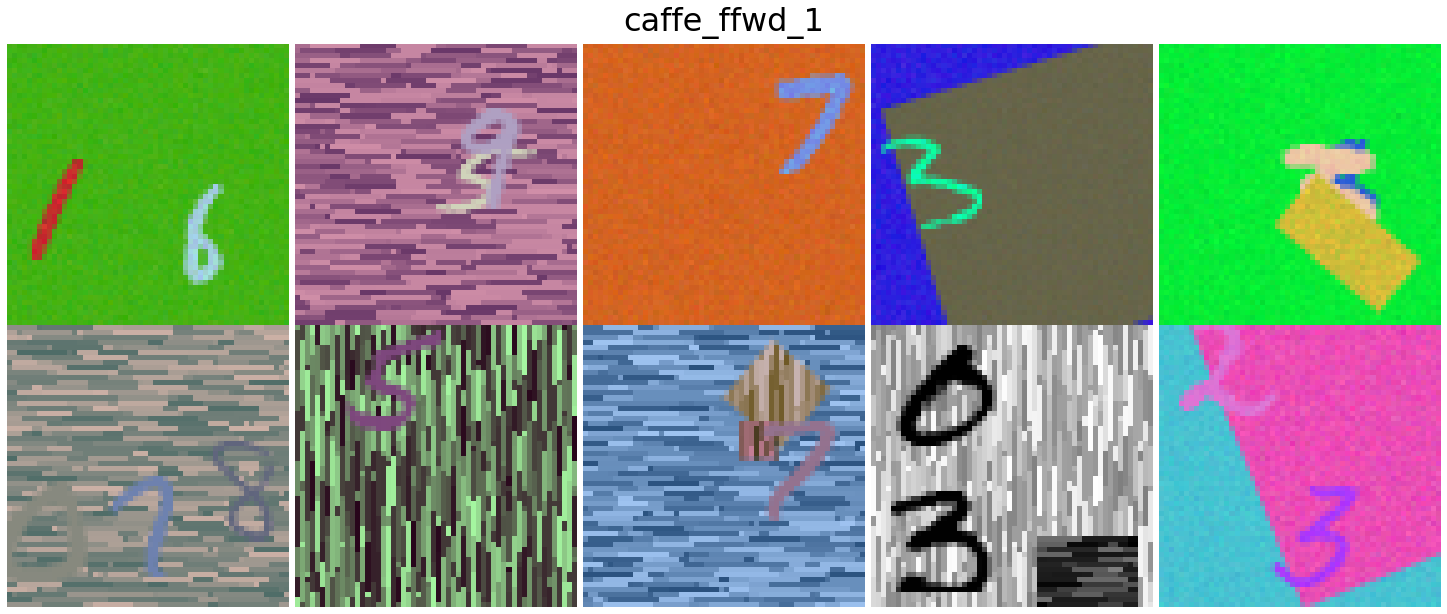

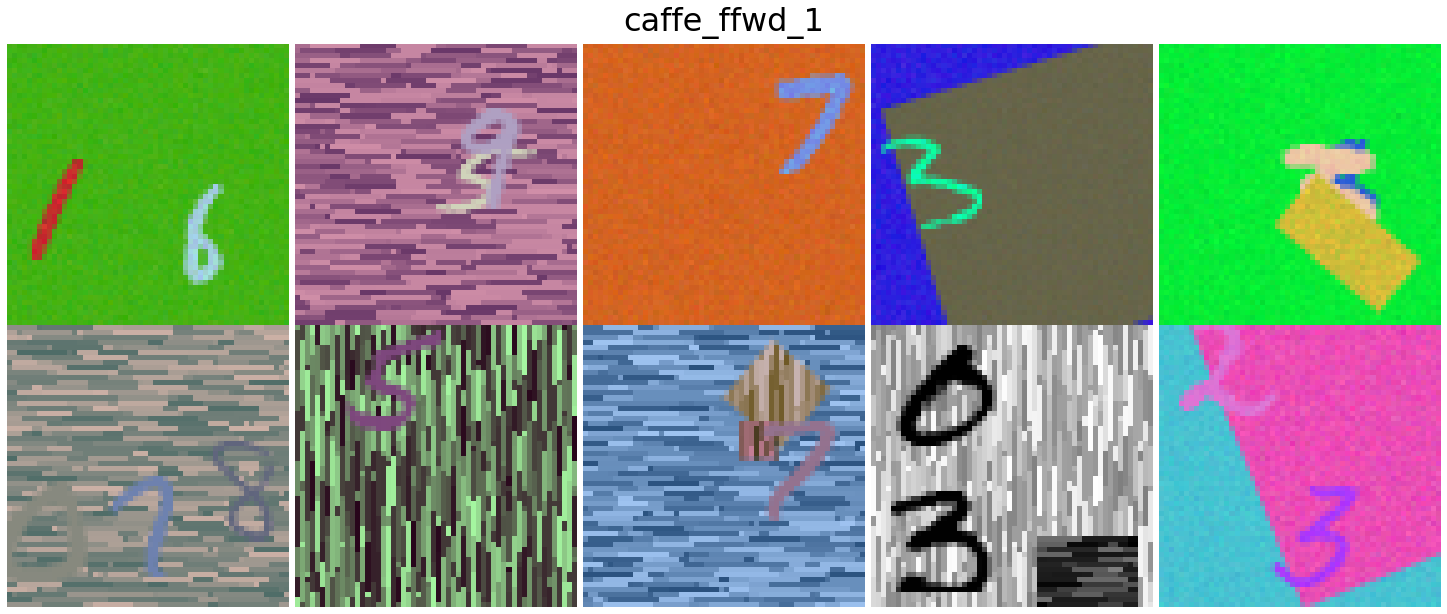

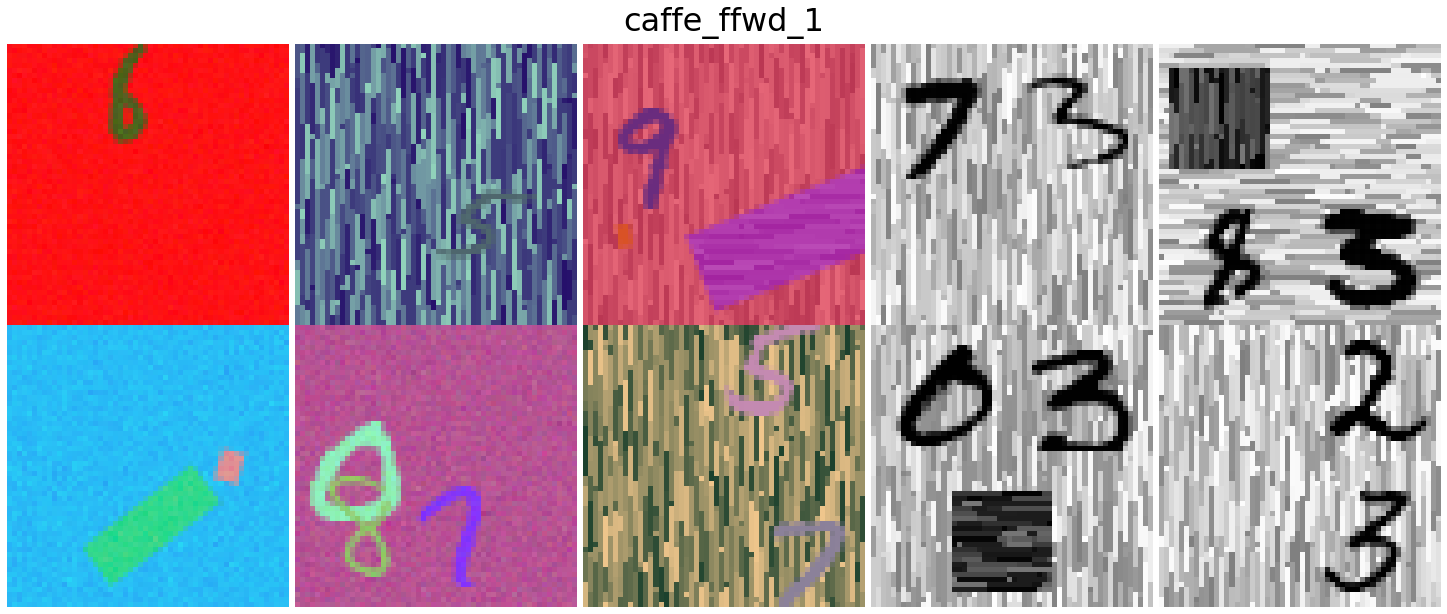

In [4]:
display_montage('caffe_ffwd_1',0)
display_montage('caffe_ffwd_1',0)
display_montage('caffe_ffwd_1',1)

Here are some examples from the third training step.

/home/jonathan/.virtualenvs/sbalk/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


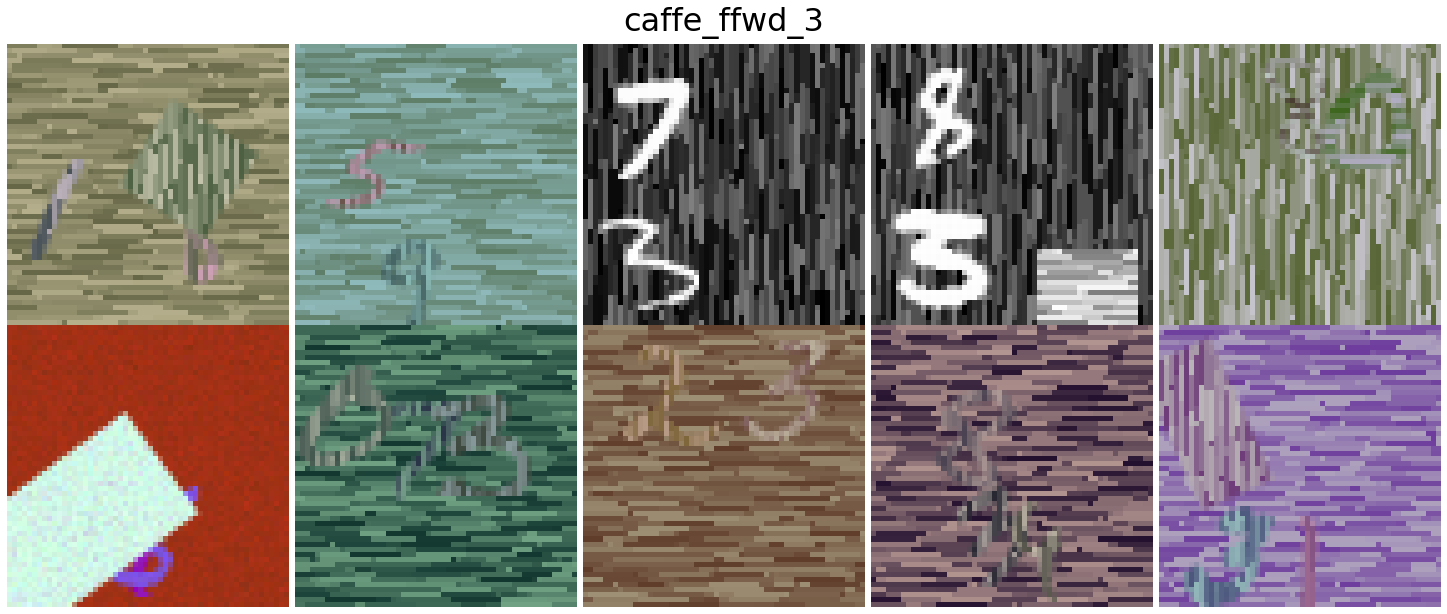

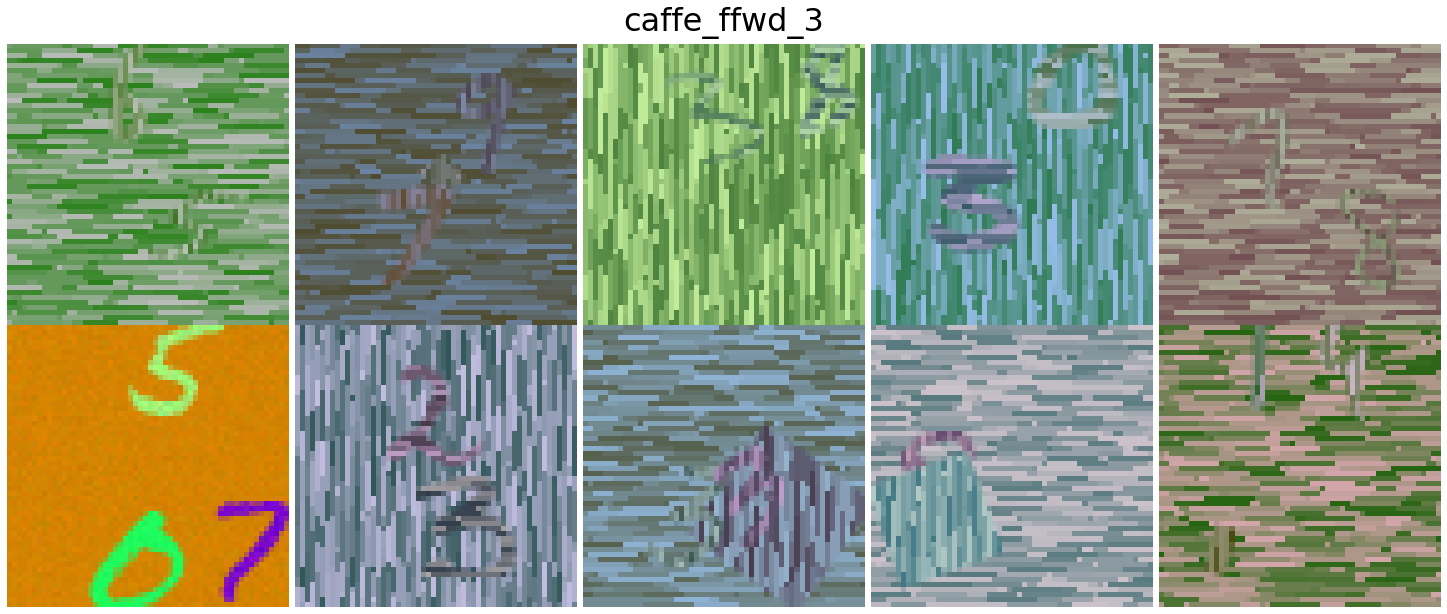

In [5]:
display_montage('caffe_ffwd_3',0)
display_montage('caffe_ffwd_3',1)

General Stimulus Set
=================

There are two main "stimulus sets": the general stimulus set and the figure ground attention stimulus set. The general stimulus set is less restricted and contains a variety of textures. It typically includes the digits 0-9 and the square and rectangle shape. Different textures can be applied to the shapes.

White Noise Texture
---------------------------

For example, in the whitenoise texture, each pixel on the same shape is IID with each shape having a different distribution.


/home/jonathan/.virtualenvs/sbalk/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


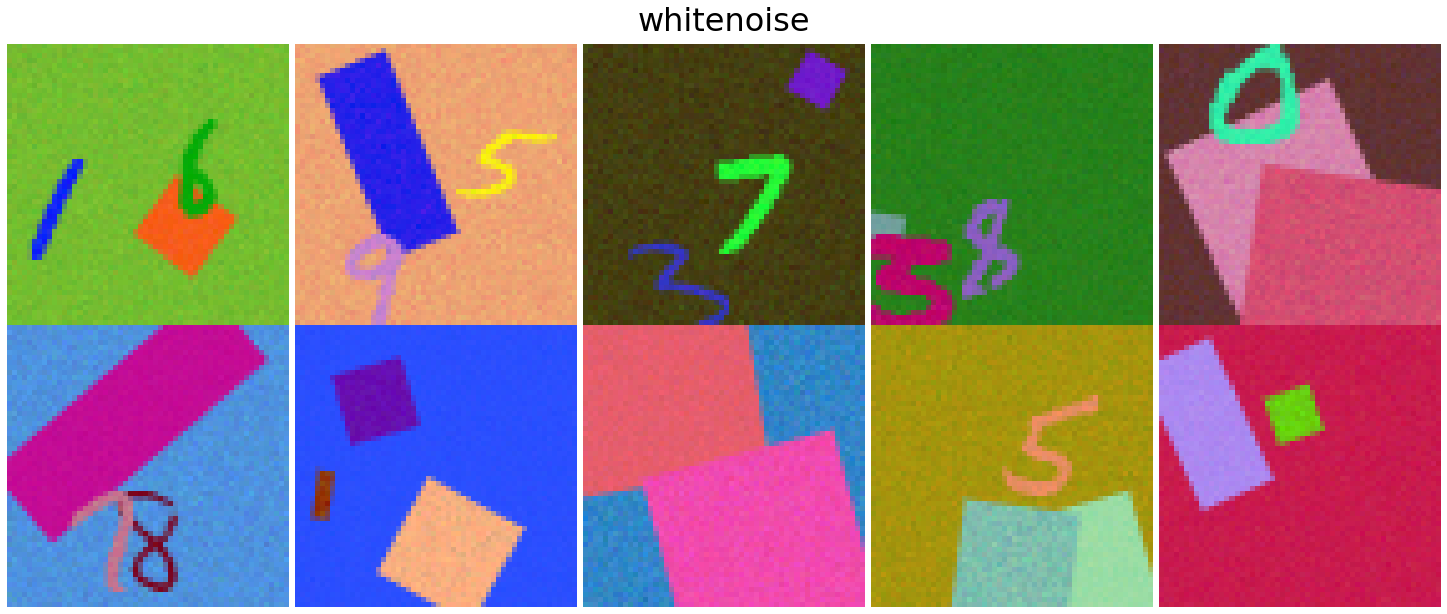

In [6]:
display_montage('whitenoise', 0)

Figure Ground Modulation Texture
---------------

There is a "FG Modulation" texture, which is based on the Lamme experiments. I do allow texture though. This is different than the figure ground attention stimulus set, which is closely aligned with the experiments used to compare with Poort's results.

/home/jonathan/.virtualenvs/sbalk/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


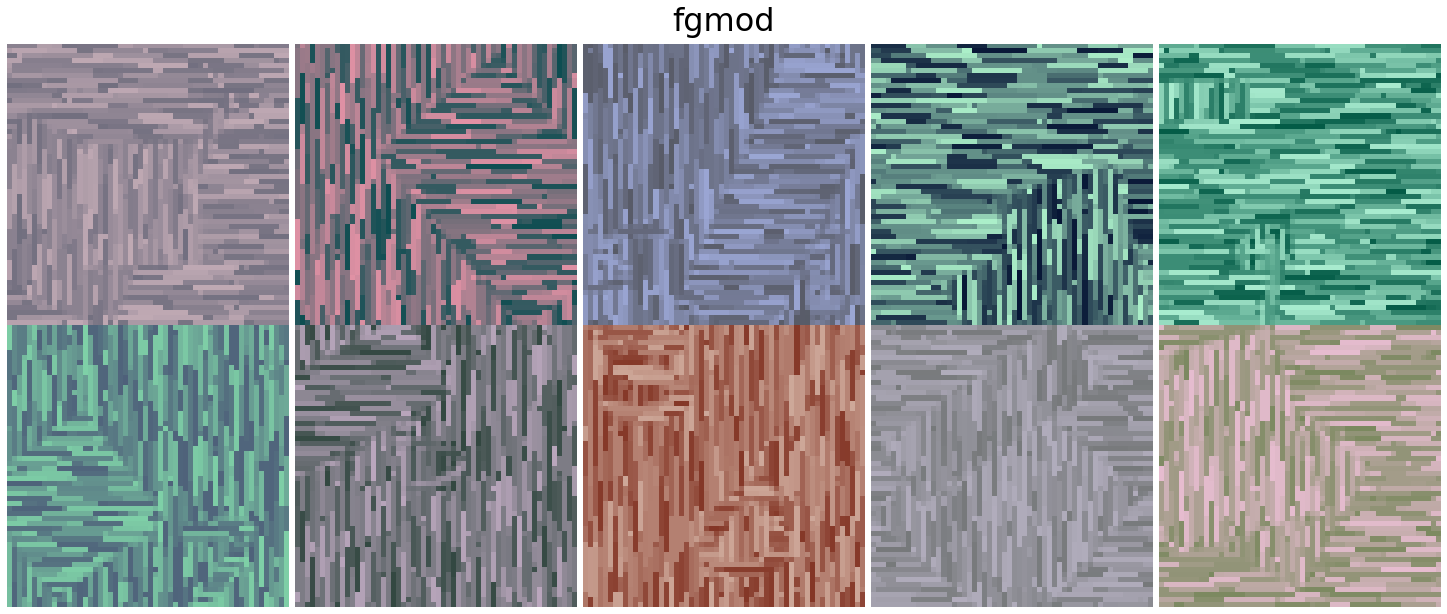

In [7]:
display_montage('fgmod')

The "alpha" or opacity of the texture can be controlled. An alpha close to zero has very little texture. This can make it very difficult to separate out the textures (unless different types of textures are applied to different objects).

/home/jonathan/.virtualenvs/sbalk/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


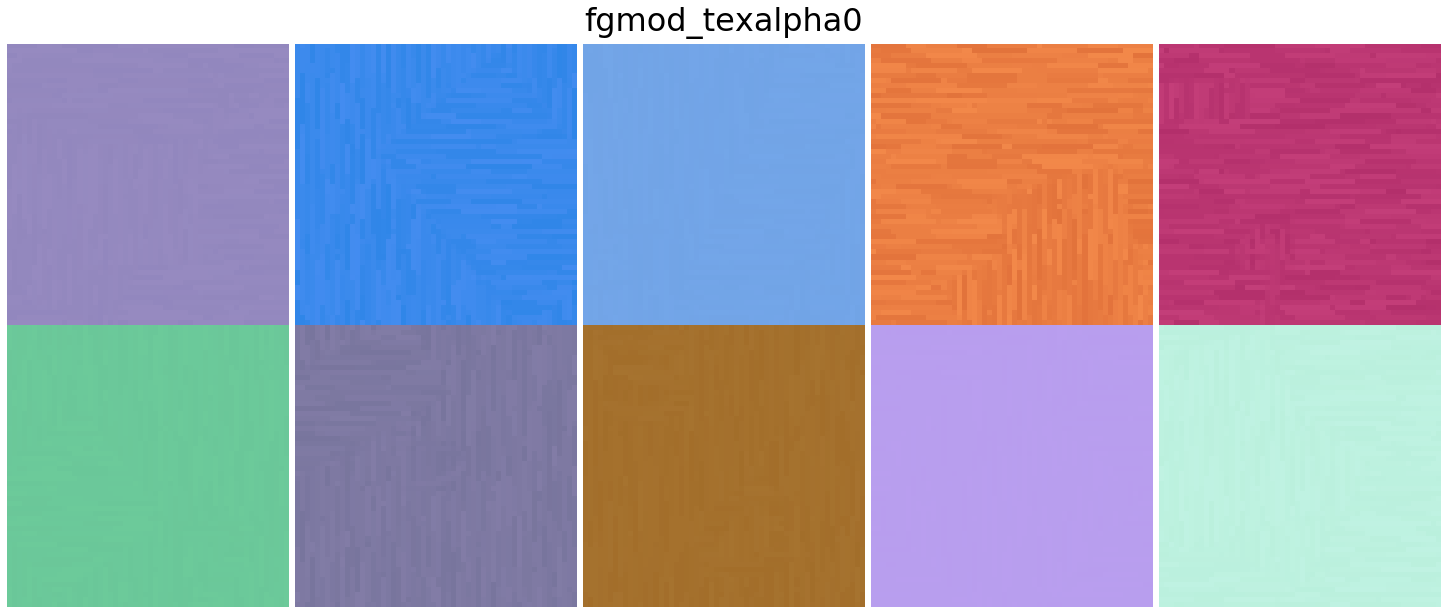

In [8]:
display_montage('fgmod_texalpha0')

The alpha can also be increased:

/home/jonathan/.virtualenvs/sbalk/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


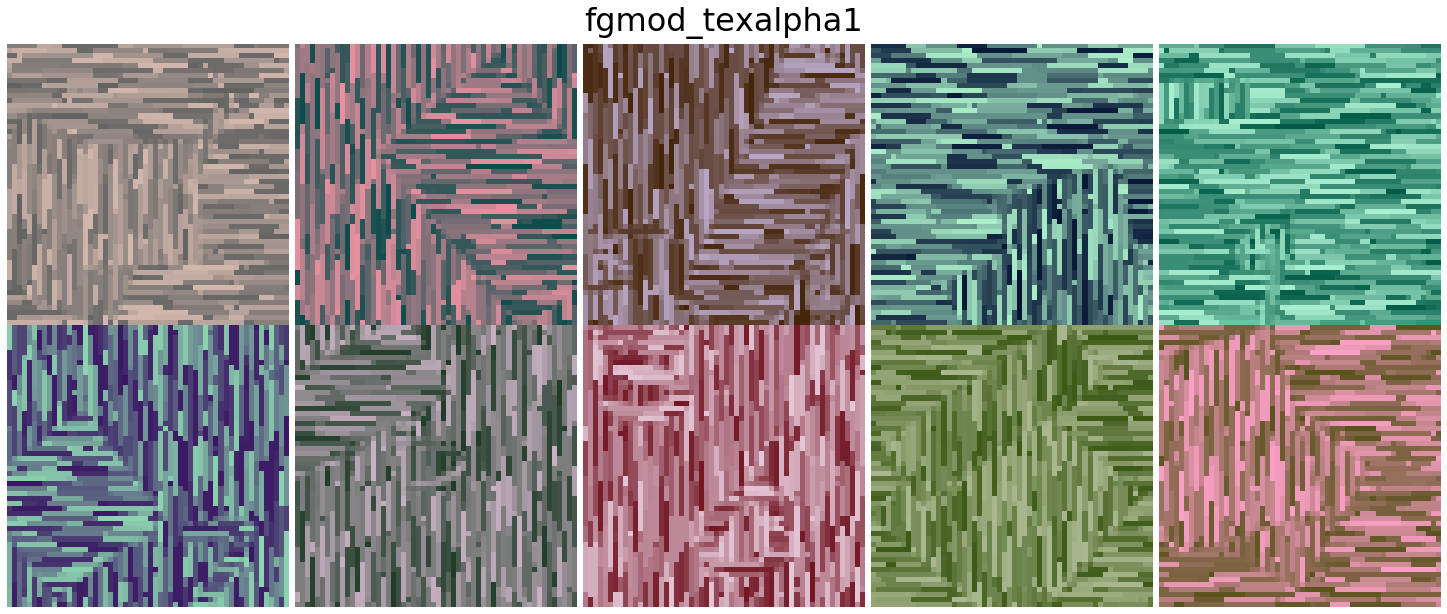

In [9]:
display_montage('fgmod_texalpha1')

Sinusoidal Gratings
-----------------

There is a sinusoidal gratings texture defined, but it wasn't used in the current implementation. I think it would be useful to include, although there should probably be some randomness to the wavelength. Shorter wavelengths might be particularly useful for digits.

/home/jonathan/.virtualenvs/sbalk/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


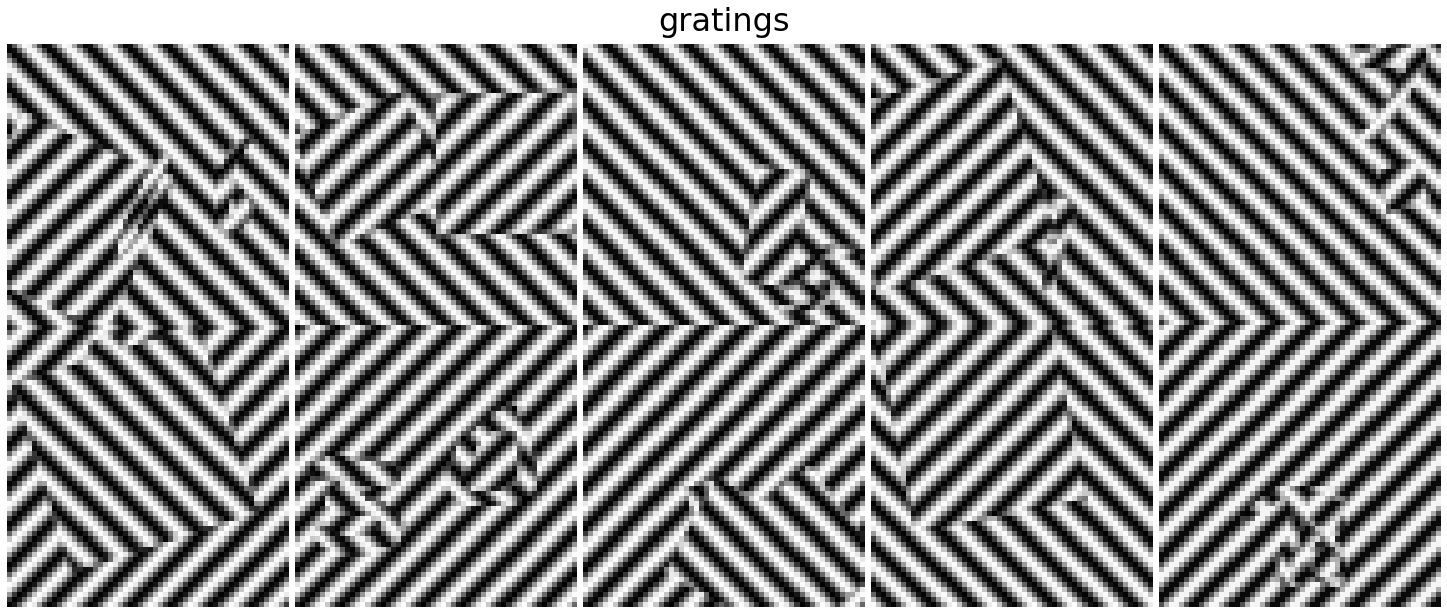

In [10]:
display_montage('gratings')

Figure ground modulation attention stimulus set
===============

This stimulus set splits the display into two halves: one with two digits and the other half either with a sliding square or empty.

/home/jonathan/.virtualenvs/sbalk/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


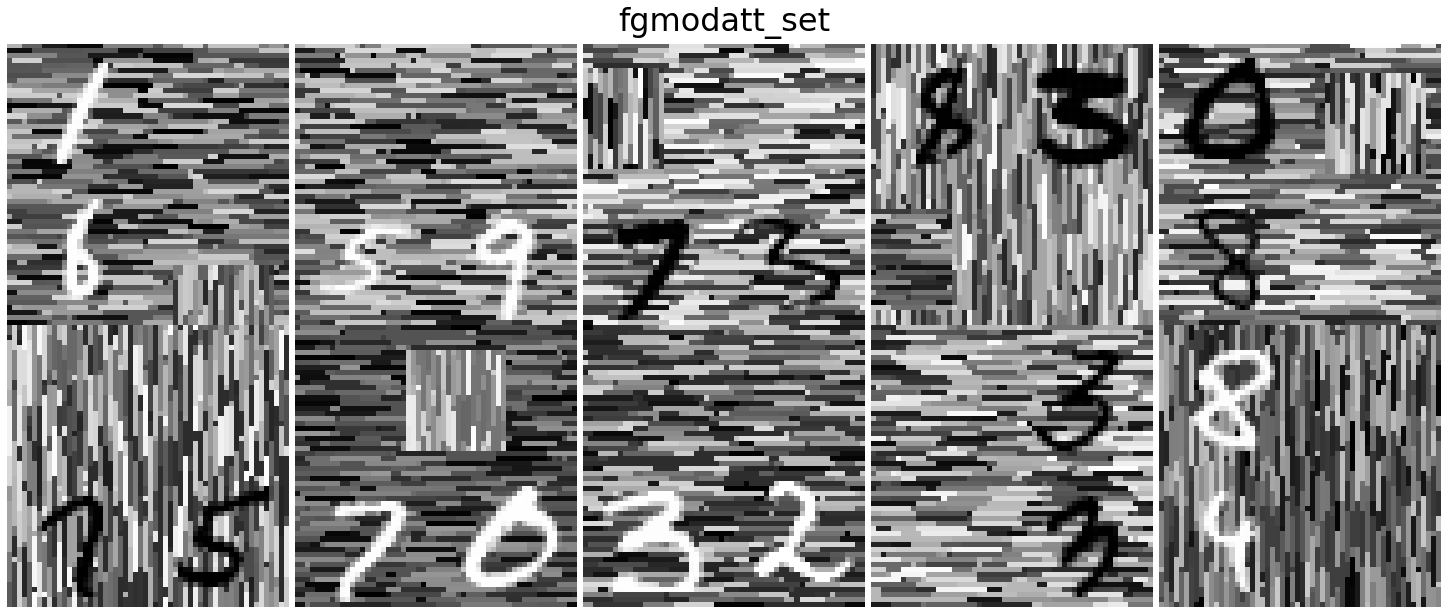

In [11]:
display_montage('fgmodatt_set')

There are two textures that are generated - one for the foreground shape and one for the background. One of the textures various from 0 to $x$, where 0 is black, and the other texture various from $1-x$ to 1, where 1 is white. The value of $x$ depends on the "overlap" of the textures. If the overlap is 0, then $x$ is 0.5, meaning that the darker texture ranges from 0 to 0.5 and the lighter texture various from 0.5 to 1. The following are examples without any overlap.

/home/jonathan/.virtualenvs/sbalk/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


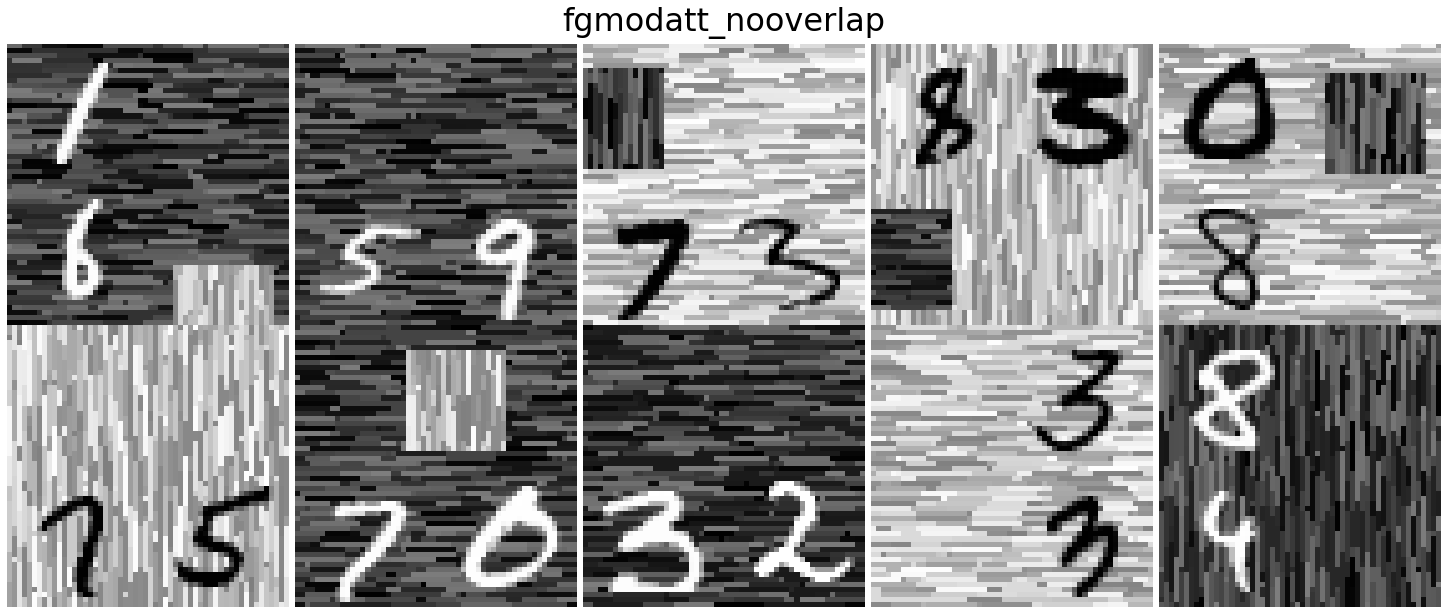

In [12]:
display_montage('fgmodatt_nooverlap', 0)

If the overlap is 1, then both of the textures colors range from the full spectrum from black to white (0 to 1).

/home/jonathan/.virtualenvs/sbalk/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


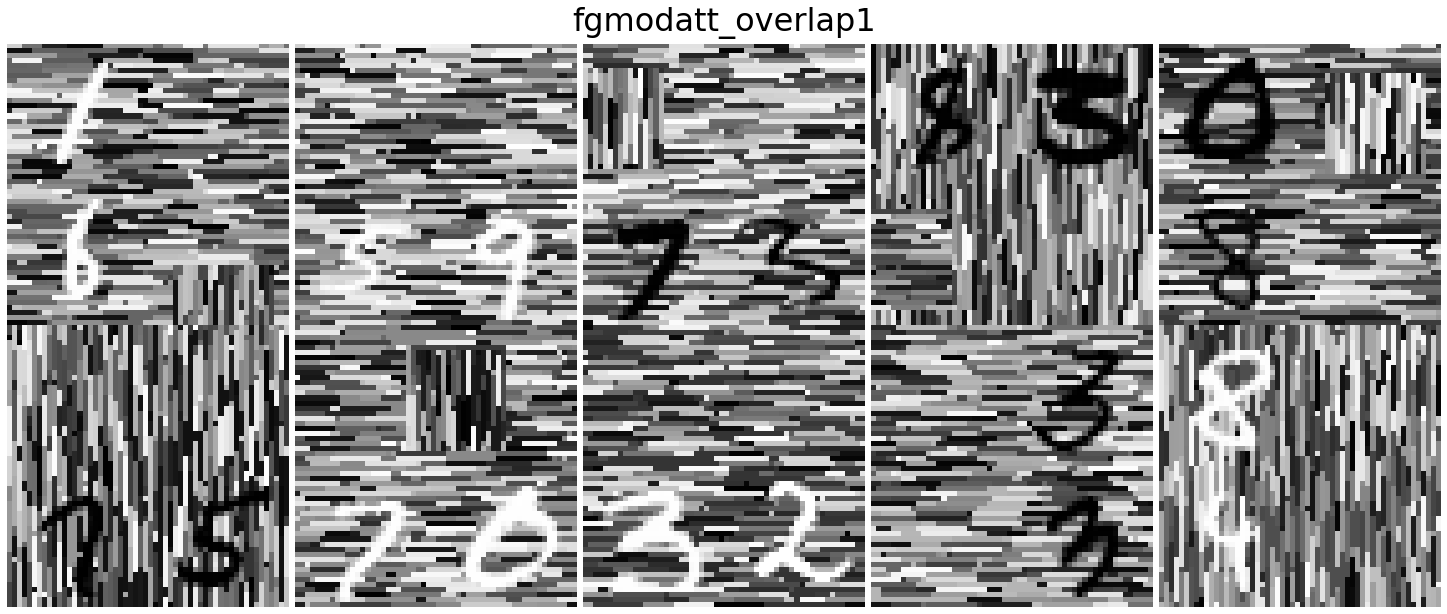

In [13]:
display_montage('fgmodatt_overlap1', )

If the overlap is 0.5, then the textures range from 0 to 0.75 and 0.25 to 1.

/home/jonathan/.virtualenvs/sbalk/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


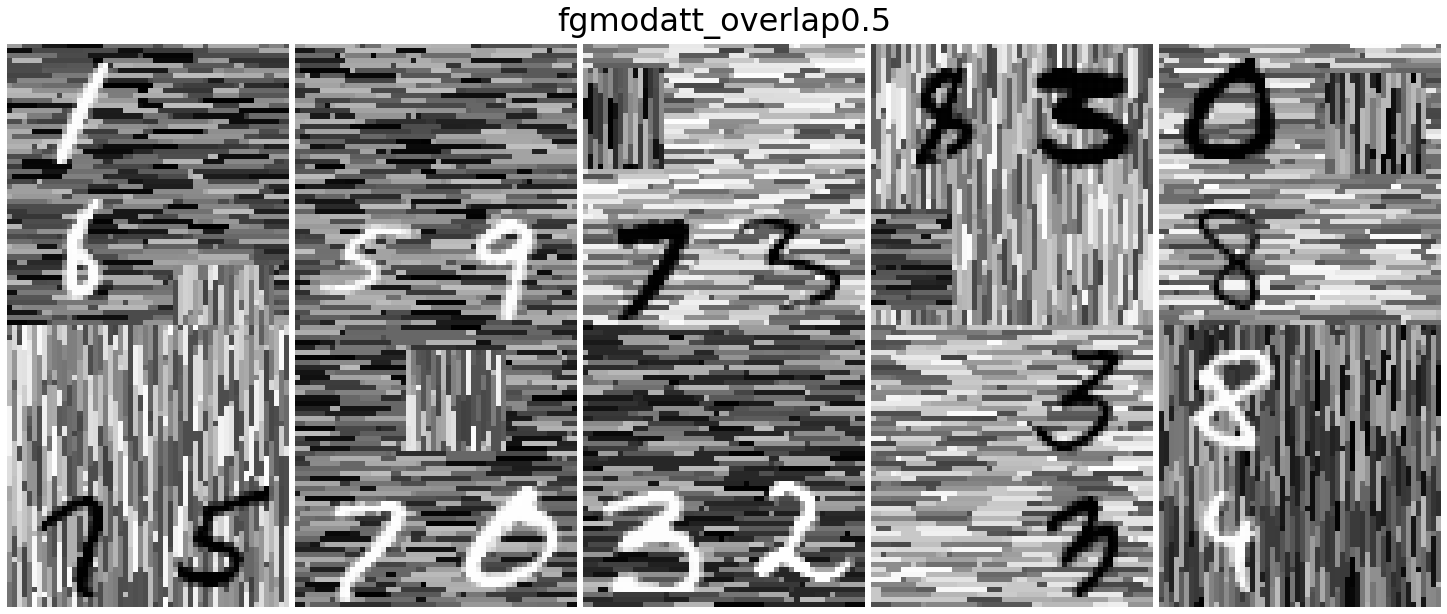

In [14]:
display_montage('fgmodatt_overlap0.5', )

The parameter `fgmodatt_color_overlap` takes a tuple, which gives the range of the overlap values that can be used. For each example, an overlap value is randomly drawn from that range.